<center>
<img src="https://image.aladin.co.kr/product/12609/37/cover500/k372532974_1.jpg" width="200" height="200"><br>
</center>

# 1장 서울시 구별 cctv 현황 분석

서울시의 구별 CCTV 현황을 분석해보자. 단순히 어디에 CCTV가 많이 설치 됐는지부터 시작해서 구별 인구 대비 비율을 확인하는 것까지 진행 한다. 특히 인구 현황을 보면서 구별 인구 현황에 대해서도 확인해보자. 그리고 구별 CCTV 현황을 시각화하는 부분도 알아보자.저자의 코드와, 데이터의 원본은 다음을 확인하자. 

 - Github: [PinkWink](https://github.com/PinkWink/DataScience)

### 1-1 파이썬에서 텍스트 파일과 엑셀 파일 읽기

pandas 모듈을 사용해 read_csv 함수를 사용하자. CCTV 데이터는 UTF-8로 인코딩 되어 있어서 옵션값으로 encoding = 'utf-8'을 지정 해주었다. 그리고 이는 CCTV_Seoul로 지정해주자. 

In [1]:
import pandas as pd
CCTV_Seoul = pd.read_csv("data/01. CCTV_in_Seoul.csv", encoding = 'utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


CCTV_Seoul의 컬럼명을 알아보자. 

In [2]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

이렇게 첫번째 컬럼의 기관명을 '구별'로 변경 해주자. 다음의 코드를 확인하자. 컬럼명을 변경하기 위해서는 rename 메서드를 사용한다. 그리고 옵션으로 inplace=True옵션을 사용해 변수의 내용을 갱신한다.

In [3]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


이제 두 번째 받은 엑셀 파일을 읽어오자.

In [4]:
pop_Seoul = pd.read_csv("data/01. population_in_Seoul.csv", encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2,20764


데이터가 처음에 엑셀로 되어 있어서 csv로 변환 시켜주었다. 그러나 이는 보니 1~3행이 알수가 없어서 다음의 옵션을 주자.

In [5]:
pop_Seoul = pd.read_csv("data/01. population_in_Seoul.csv", 
                        header = 2,
                        encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.0,1321458
1,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.0,25425
2,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.0,20764
3,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.0,36231
4,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.0,39997


In [6]:
pop_Seoul = pop_Seoul.iloc[:, [1,3,6, 9,13]]


In [7]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


이렇게 필요한 데이터만 수집을 해두었으니 컬럼명을 변경 해주자.

In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


### 1-2 pandas 이용해서 CCTV와 인구 현황 데이터 파악

이제 pandas를 이용해서 두 데이터를 정리해보자. 우선 CCTV 데이터를 먼저 파악하자.

#### 1-2-1 서울시 CCTV 데이터 파악

In [9]:
import pandas as pd
import numpy as np

In [10]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


구별 CCTV 데이터에서 CCTV 전체 개수인 소계로 정렬을 해보자. 이때 ascending=TRUE옵션을 주어 오름차순으로 정렬해준다. 다음을 보면 CCTV 전체 개수가 가장 작은 구는 도봉수, 마포구, 송파구, 중랑구 의 순서로 나타나는 것을 알수 있다. 이때 의아한 점이라면 송파구의 개수가 서울에서 하위 3개 인데 송파구는 이는 집어 두자. 

In [11]:
CCTV_Seoul.sort_values(by = '소계', ascending = True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


다음은 ascending=False옵션으로 내림차순을 해준 결과 이다. 가장 많은 구는 강남구, 양천구, 서초구, 은평구, 용산구로 나타난다. 

In [12]:
CCTV_Seoul.sort_values(by = '소계', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


또한 2014년부터 2016년까지 3년간 CCTV 수를 더하고 2013년 이전 CCTV수로 나누어 3년간의 CCTV 증가율을 계산하자. 그리고 '최근증가율'이라는 새로운 컬럼을 생성해주자.

In [13]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100

CCTV_Seoul.sort_values(by = '최근증가율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


이렇게 최근 증가율을 확인해보면 종로구, 도봉구, 마포구 순서로 증가 했음을 알 수 있다. 다음은 서울시의 인구 현황을 살펴 보자.

#### 1-2-2 서울시 인구 현황

In [14]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


이를 보니 0번행에 합계가 보인다. 아마 서울시 전체 합계를 넣어둔 것인데 이는 필요 없으니 drop 메서드를 사용해 지우도록 하자. 

In [15]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997
5,광진구,372164,357211,14953,42214


pop_Seoul 데이터의 '구별'컬럼의 고육값을 확인해보자. 

In [16]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

이렇게 파악해보니 끝에 nan이 있으니 이를 한번 확인해보자. isnull 메서드로 확인할 수 있다. 26번 행이 NaN이 있음을 확인할 수 있다.

In [17]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


이제 각 구별 전체 인구를 이용해서 구별 '외국인비율'과 '고령자비율'을 계산해보자.

In [18]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
4,성동구,311244,303380,7864,39997,2.526635,12.850689
5,광진구,372164,357211,14953,42214,4.017852,11.342849


인구수로 정렬하여 다음을 확인해보자. 

In [19]:
pop_Seoul.sort_values(by='인구수', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483,660584,6899,72506,1.033584,10.862599
16,강서구,603772,597248,6524,72548,1.080540,12.015794
23,강남구,570500,565550,4950,63167,0.867660,11.072217
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


송파구, 강서구, 강남구, 노원구, 관악구 순서로 인구가 많다는걸 확인할 수 있다.

In [20]:
pop_Seoul.sort_values(by='외국인', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
17,구로구,447874,416487,31387,56833,7.007998,12.689506
18,금천구,255082,236353,18729,32970,7.342345,12.925255
21,관악구,525515,507203,18312,68082,3.484582,12.955291
6,동대문구,369496,354079,15417,54173,4.172440,14.661322


외국인 숫자의 비율은 영등포, 구로구, 금천구, 관악구, 동대문구 순으로 높은것을 알 수 있다. 

In [21]:
pop_Seoul.sort_values(by='외국인비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
18,금천구,255082,236353,18729,32970,7.342345,12.925255
17,구로구,447874,416487,31387,56833,7.007998,12.689506
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427


이번에는 외국인 비율을 알아보자. 외국인 비율은 영등포, 금천구, 구로구, 중구, 용산구 순서로 나타나는 것을 확인할 수 있다.

In [22]:
pop_Seoul.sort_values(by='고령자', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772,597248,6524,72548,1.080540,12.015794
24,송파구,667483,660584,6899,72506,1.033584,10.862599
12,은평구,494388,489943,4445,72334,0.899091,14.631019
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


고령자 순서로 보면 강서구, 송파구, 은평구, 노원구, 관악구임을 알 수 있다.

In [23]:
pop_Seoul.sort_values(by='고령자비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192,326686,3506,54813,1.061806,16.600342
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
13,서대문구,327163,314982,12181,48161,3.723221,14.720797


고령자의 비율을 보면 강북구, 종로구, 중구, 용산구, 서대문구 순서임을 확인할 수 있다.

지금까지 간략하게나마 CCTV의 현황을 파악해보았으나 아직은 부족하다. 인구대비 CCTV 현황을 알기 위해 두 데이터를 병합해주자.

#### 1-3 CCTV 데이터와 인구 현황 데이터 합치고 분석

판다스의 merge 메서드를 사용해서 두 데이터를 합쳐 주자. 공통 컬럼인 '구별'컬럼을 기준으로 합쳐 주면 된다.

In [24]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500,565550,4950,63167,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233,449019,4214,54622,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192,326686,3506,54813,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772,597248,6524,72548,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515,507203,18312,68082,3.484582,12.955291


이제 의미 없는 컬럼은 모두 제거 해주자. 열을 삭제하기 위해서든 del 명령어를 사용한다. 

In [25]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
1,강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
2,강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
3,강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
4,관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


이번에는 인덱스를 구별로 바꿔보자. 코드는 다음과 같다.

In [26]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


#### 상관계수 조사
이번에는 각 데이터간의 상관계수를 파악해보자. -1 ~ 1사이의 값을 가지며 음의 상관관계, 양의 상관관계를 갖게되는 상관관계는, 절대값이 0.1이하면 무시, 0.3이면 약한 상관관계, 0.7이하면 뚜렷한 상관관계라고 한다. 그럼 이 데이터의 상관관계를 파악해보자.

In [27]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [28]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [29]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

이렇게 파악을 해보면 CCTV개수와 고령자비율은 약한 음의 상관관계로 외국인 비율과는 큰 의미가 없다고 할 수 있다. 반면, 인구수와는 0.3정도로 약한 상관관계를 가지며 좀 더 들여다 볼 여지가 있다고 판단된다.

In [30]:
data_result.sort_values(by = '소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
양천구,2034,34.671731,479978,475949,4029,52975,0.839413,11.036964
서초구,1930,63.371266,450310,445994,4316,51733,0.958451,11.488308
은평구,1873,85.237258,494388,489943,4445,72334,0.899091,14.631019
용산구,1624,53.216374,244203,229456,14747,36231,6.038828,14.836427


In [31]:
data_result.sort_values(by = '인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483,660584,6899,72506,1.033584,10.862599
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
노원구,1265,188.929889,569384,565565,3819,71941,0.670725,12.634883
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


이렇게 파악을 해보면 CCTV가 많이 설치된 구와, 인구수가 많은 구를 시각적으로 비교해보자.

#### 1-4 CCTV 현황 그래프 분석

Matplotlib 모듈을 사용해서 분석을 해보자. 여기서 하나 알아야 할점이 있다면 한글 폰트 문제가 필요 한데, 다음과 같이 한글 폰트를 지정 해주자.

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

이제 한글폰트를 넣어 주었으니 plot를 그려 보자. kind='barh'옵션을 지정해주어 수평(bar)로 해놓았고, grid=True로 grid를 해주었고, figsize로 그림크기를 지정해주었다.

<AxesSubplot:ylabel='구별'>

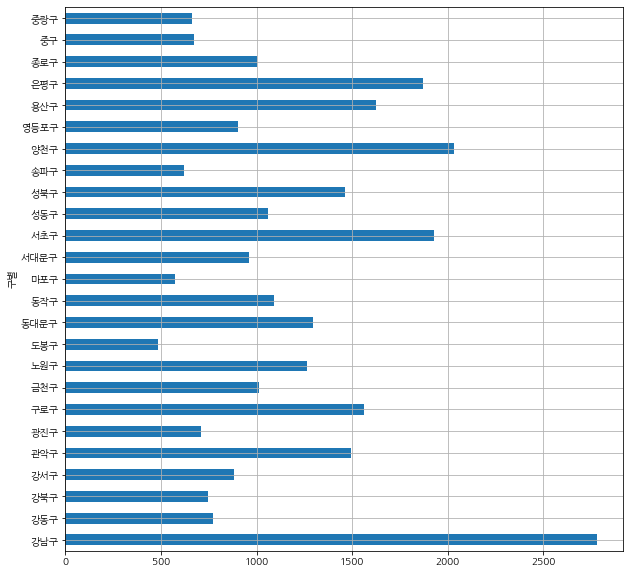

In [34]:
data_result['소계'].plot(kind='barh', grid = True, figsize=(10,10))

이번에는 추가로, sort_values 메서드를 해주어 정렬을 시켜주고 다음과 같이 그리면 시각화에도 정렬이 되는것을 확인할 수 있다.

<AxesSubplot:ylabel='구별'>

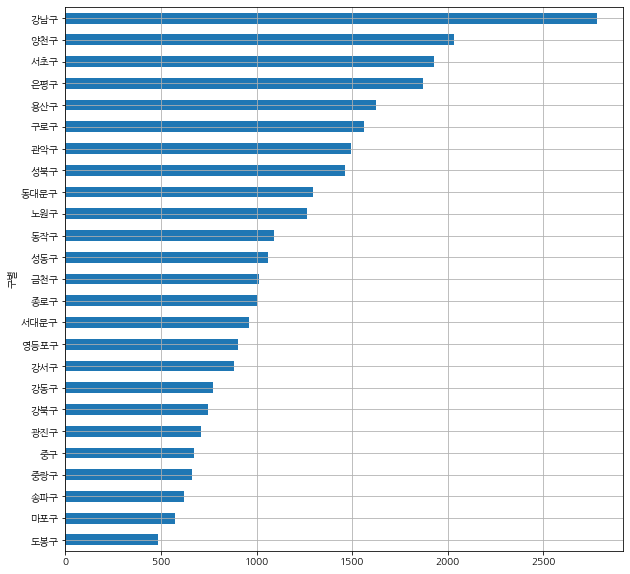

In [35]:
data_result['소계'].sort_values().plot(kind='barh', grid = True, figsize=(10,10))

이번에는 인구 대비 CCTV 비율을 계산해서 정렬하고 그려보자. 인구수로 파악 했을때와는 달리 이번에는 용산구와, 종로구가 월등히 높다. 

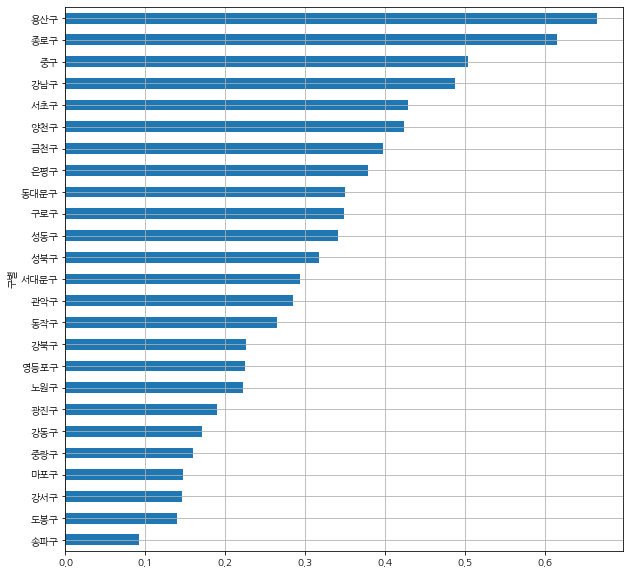

In [36]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid = True, figsize=(10,10))

plt.show()

조금 더 나아가 보자. scatter 함수를 사용해서 인구수와 CCTV간의 상관관계를 보도록 하자. 

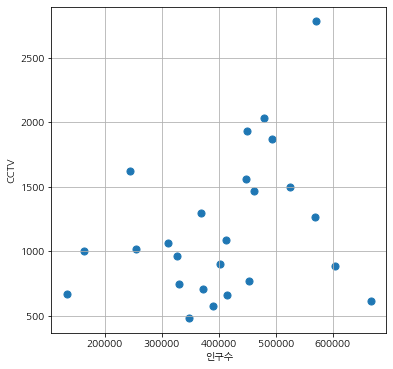

In [37]:
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

이제 이를 바탕으로 직선을 하나 그려주자.

In [38]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1 

array([1.30916415e-03, 6.45066497e+02])

In [39]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

이제 numpy의 polyfit 함수로 직선을 만들어 주자.

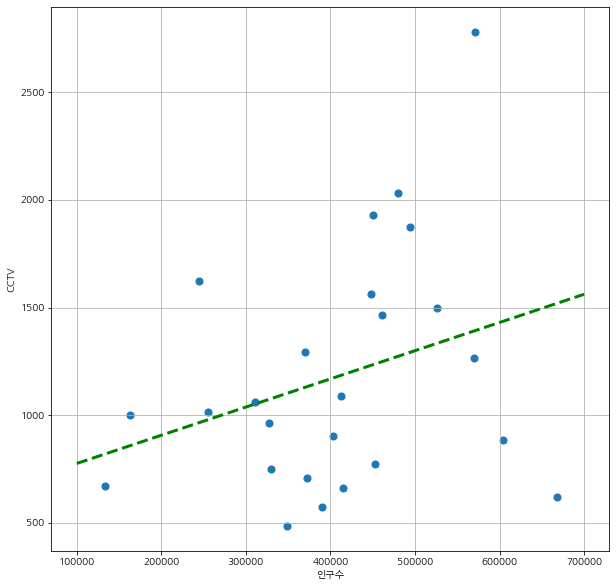

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

이제 여기에 색을 입혀서 여러가지 옵션을 넣어 주자.

In [42]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by = '오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483,660584,6899,72506,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978,475949,4029,52975,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310,445994,4316,51733,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203,229456,14747,36231,6.038828,14.836427,0.665020,659.231690


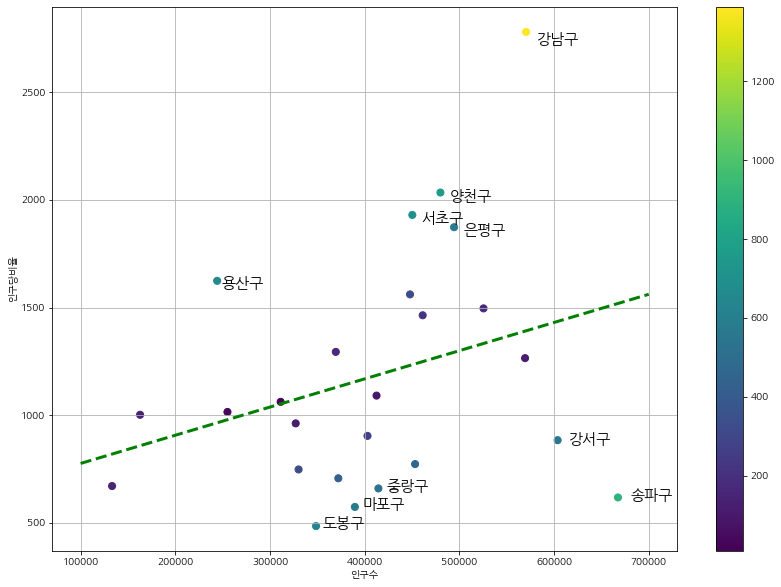

In [43]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c=data_result['오차'], s = 50)

plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

이를 기준으로 강남구,양천구, 서초구, 은평구, 용산구는 서울시 전 지역의 일반적인 경향보다 CCTV가 많이 설치 되어 있는것을 알 ㅇ수 있다. 그리고 송파구, 강서구, 중랑구, 마포구, 도봉구는 일반적인 경향보다 적게 설치된 지역이다. 특히 강남구는 많이 설치 되어 있는 반면 송파구는 설치가 잘 안되어 있는것을 확인할 수 있다.